# Solución de Modelos Poblacionales
Este notebook contiene la resolución analítica, gráfica (geométrica) y numérica (método de Euler) para dos modelos de crecimiento poblacional universitaria: logístico y lineal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Function, Eq, dsolve, exp, simplify
from sympy.abc import t


## Modelo Logístico: $$\frac{dx}{dt} = 0.25x - \frac{1}{120000}x^2$$
**Población inicial:** 10,000 estudiantes

In [2]:
x = Function('x')
a = 0.25
b = 1/120000
logistic_eq = Eq(x(t).diff(t), a * x(t) - b * x(t)**2)
logistic_sol = dsolve(logistic_eq, x(t))
logistic_sol.simplify()


Eq(x(t), -30000.0*exp(0.25*t)/(C1 - exp(0.25*t)))

**Análisis del equilibrio:**

El equilibrio se alcanza cuando $$\frac{dx}{dt} = 0$$:

$$0 = ax - bx^2 \Rightarrow x(a - bx) = 0 \Rightarrow x = 0 \text{ o } x = \frac{a}{b} = \frac{0.25}{1/120000} = 30000$$

Por tanto, el equilibrio poblacional es de **30,000 estudiantes**.

### Solución numérica (Euler) para el modelo logístico

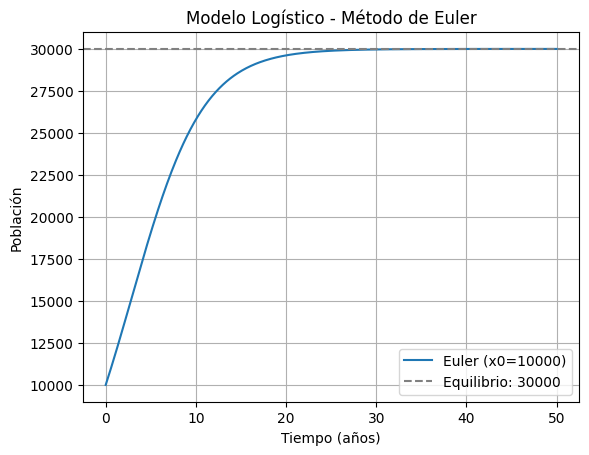

In [3]:
def euler_logistico(x0, a, b, h, T):
    t_vals = np.arange(0, T+h, h)
    x_vals = np.zeros(len(t_vals))
    x_vals[0] = x0
    for i in range(1, len(t_vals)):
        x_vals[i] = x_vals[i-1] + h * (a * x_vals[i-1] - b * x_vals[i-1]**2)
    return t_vals, x_vals

x0 = 10000
t_vals, x_vals = euler_logistico(x0, 0.25, 1/120000, 0.1, 50)

plt.plot(t_vals, x_vals, label='Euler (x0=10000)')
plt.axhline(30000, color='gray', linestyle='--', label='Equilibrio: 30000')
plt.xlabel('Tiempo (años)')
plt.ylabel('Población')
plt.title('Modelo Logístico - Método de Euler')
plt.legend()
plt.grid(True)
plt.show()


## Modelo Lineal: $$\frac{dx}{dt} = 2000 - 0.15x$$
**Población inicial:** 18,000 estudiantes

In [4]:
x = Function('x')
r = 2000
d = 0.15
linear_eq = Eq(x(t).diff(t), r - d * x(t))
linear_sol = dsolve(linear_eq, x(t))
linear_sol.simplify()


Eq(x(t), C1*exp(-0.15*t) + 13333.3333333333)

**Equilibrio poblacional:**

Se obtiene igualando $$\frac{dx}{dt} = 0$$:

$$0 = 2000 - 0.15x \Rightarrow x = \frac{2000}{0.15} = 13333.33$$

Por tanto, la población se estabiliza en **13,333 estudiantes** aproximadamente.

### Solución numérica (Euler) para el modelo lineal

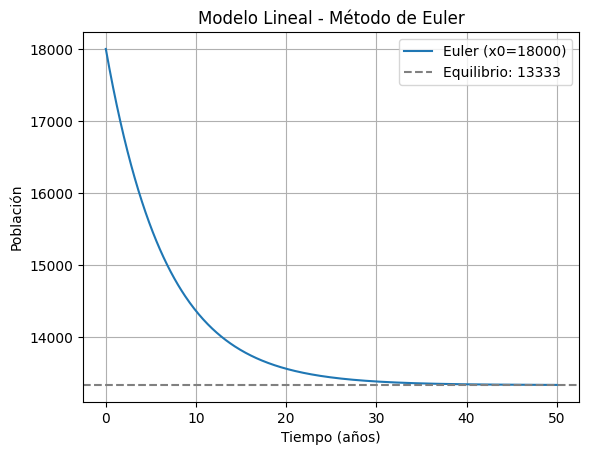

In [5]:
def euler_lineal(x0, r, d, h, T):
    t_vals = np.arange(0, T+h, h)
    x_vals = np.zeros(len(t_vals))
    x_vals[0] = x0
    for i in range(1, len(t_vals)):
        x_vals[i] = x_vals[i-1] + h * (r - d * x_vals[i-1])
    return t_vals, x_vals

x0 = 18000
t_vals_lin, x_vals_lin = euler_lineal(x0, 2000, 0.15, 0.1, 50)

plt.plot(t_vals_lin, x_vals_lin, label='Euler (x0=18000)')
plt.axhline(2000/0.15, color='gray', linestyle='--', label='Equilibrio: 13333')
plt.xlabel('Tiempo (años)')
plt.ylabel('Población')
plt.title('Modelo Lineal - Método de Euler')
plt.legend()
plt.grid(True)
plt.show()
